# FB - Prophet starter

Package by FB for time series predictions

Import all pachages needed:

In [ ]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib

Import data and see its structure

In [24]:
data = pd.DataFrame(pd.read_csv('train.csv', index_col=0))
data = data.reset_index()
print ("data:" , data.shape)
data.head()

data: (61, 2)


,date,Vehicles
0,11/1/2015,3271
1,11/2/2015,11995
2,11/3/2015,4690
3,11/4/2015,3276
4,11/5/2015,2955


Data prep before running prophet

In [27]:
df = data
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = np.log(df['y']) # LOG
df.head()

,ds,y
0,2015-11-01,8.092851
1,2015-11-02,9.392245
2,2015-11-03,8.453188
3,2015-11-04,8.094378
4,2015-11-05,7.991254


FB Prophet model

In [28]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet predictions

In [30]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
86,2016-01-26
87,2016-01-27
88,2016-01-28
89,2016-01-29
90,2016-01-30


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
86,2016-01-26,8.472881,7.643611,9.245793
87,2016-01-27,7.796852,7.069111,8.551187
88,2016-01-28,7.619701,6.833703,8.387552
89,2016-01-29,7.564252,6.724238,8.386735
90,2016-01-30,7.062072,6.315507,7.806069


Plot data and forecasts

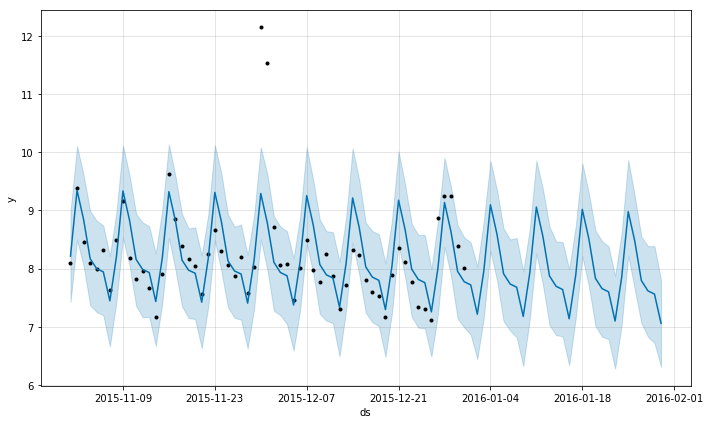

In [34]:
%matplotlib inline 
m.plot(forecast);